In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


def combine_dfs(df1, df2, df3, df4, df5, df6) -> pd.DataFrame:
    df1 = df1.dropna(how="all")
    df2 = df2.dropna(how="all")
    df3 = df3.dropna(how="all")
    df4 = df4.dropna(how="all")
    df5 = df5.dropna(how="all")
    df6 = df6.dropna(how="all")
    df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
    return df


def plot_citation_degree_distribution(df: pd.DataFrame) -> plt.Figure:
    """
    Plots the citation degree distribution from a DataFrame of publications.

    The function assumes that the DataFrame contains a column named
    'cited_by_count' representing the number of citations for each publication.

    The plot is a scatter plot showing, for each citation count (degree),
    the number of publications with that count, using a log-log scale.
    """
    # Compute the frequency of each citation count
    distribution = df["cited_by_count"].value_counts().sort_index().reset_index()
    distribution.columns = ["cited_by_count", "frequency"]

    # Create the scatter plot
    fig = plt.figure(figsize=(10, 6))
    sns.scatterplot(data=distribution, x="cited_by_count", y="frequency")
    plt.xlabel("Number of Citations")
    plt.ylabel("Number of Publications")
    plt.title("Citation Degree Distribution")

    # Use log scales to better display heavy-tailed distributions
    plt.xscale("log")
    plt.yscale("log")

    # Improve layout and add grid for easier reading
    # plt.grid(True, which="both", ls="--", lw=0.5)
    plt.tight_layout()

    return fig


def filter_subfielf_publications(df: pd.DataFrame, subfiled: str) -> pd.DataFrame:
    """
    Filters the DataFrame to include only publications where the
    subfield's display_name is 'Artificial Intelligence'.

    The function assumes that the 'subfield' column contains a JSON string.
    """
    # Use a lambda to parse the JSON and check the display_name
    filtered_df = df[
        df["subfield"].apply(lambda x: json.loads(x).get("display_name") == subfiled)
    ]
    return filtered_df

In [35]:
DATA_PATH = "../data/csv/openalex/br_publications_"

df_2019 = pd.read_csv(DATA_PATH + "2019.csv")
df_2020 = pd.read_csv(DATA_PATH + "2020.csv")
df_2021 = pd.read_csv(DATA_PATH + "2021.csv")
df_2022 = pd.read_csv(DATA_PATH + "2022.csv")
df_2023 = pd.read_csv(DATA_PATH + "2023.csv")
df_2024 = pd.read_csv(DATA_PATH + "2024.csv")

In [36]:
br_publications_df = combine_dfs(df_2019, df_2020, df_2021, df_2022, df_2023, df_2024)
br_publications_df.head()

,id,doi,title,publication_year,authorships,subfield,cited_by_count,counts_by_year,primary_topic
0,W2928842276,10.1016/j.patrec.2019.03.022,A novel deep learning based framework for the ...,2019,"[{""id"": ""A5112426596"", ""name"": ""SanaUllah Khan...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",685,"{""6_year"": 8, ""5_year"": 96, ""4_year"": 156, ""3_...","{'id': 'T10862', 'display_name': 'AI in cancer..."
1,W2973226110,10.1016/j.ins.2019.09.013,YAKE! Keyword extraction from single documents...,2019,"[{""id"": ""A5089440969"", ""name"": ""Ricardo Campos...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",521,"{""6_year"": 2, ""5_year"": 108, ""4_year"": 157, ""3...","{'id': 'T13083', 'display_name': 'Advanced Tex..."
2,W2963174546,10.1371/journal.pone.0210236,Clustering algorithms: A comparative approach,2019,"[{""id"": ""A5074679018"", ""name"": ""Mayra Z. Rodri...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",477,"{""6_year"": 5, ""5_year"": 81, ""4_year"": 81, ""3_y...","{'id': 'T10637', 'display_name': 'Advanced Clu..."
3,W2913497771,10.1016/j.comnet.2019.01.023,Internet of Things: A survey on machine learni...,2019,"[{""id"": ""A5000302987"", ""name"": ""Kelton Augusto...","{""id"": ""subfields/1705"", ""display_name"": ""Comp...",444,"{""6_year"": 1, ""5_year"": 74, ""4_year"": 101, ""3_...","{'id': 'T10400', 'display_name': 'Network Secu..."
4,W2906764419,10.3390/drones3010004,Survey on Coverage Path Planning with Unmanned...,2019,"[{""id"": ""A5035279785"", ""name"": ""Tau\u00e3 M. C...","{""id"": ""subfields/1707"", ""display_name"": ""Comp...",438,"{""6_year"": 4, ""5_year"": 88, ""4_year"": 101, ""3_...","{'id': 'T10586', 'display_name': 'Robotic Path..."


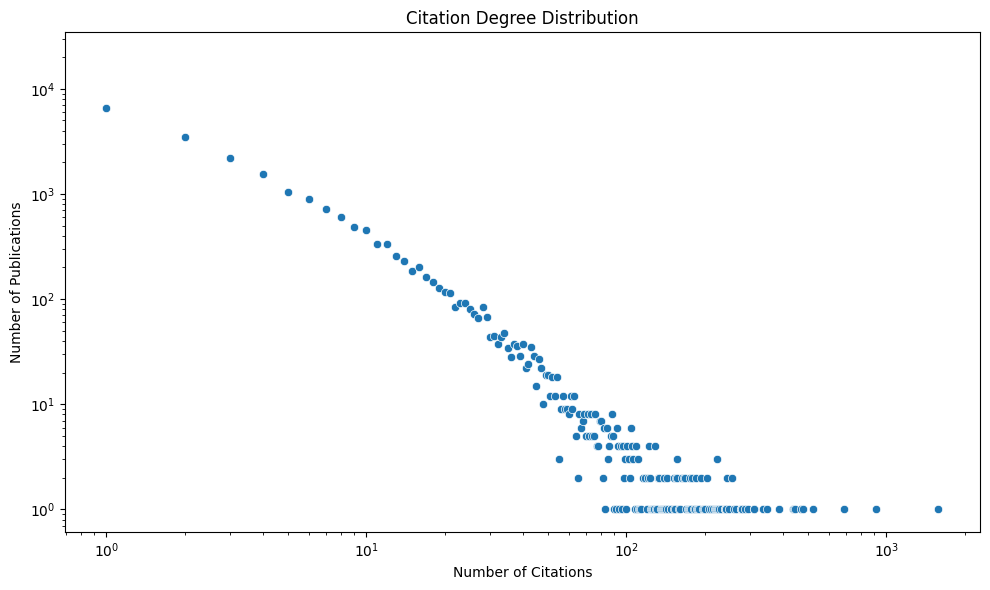

In [37]:
plot_citation_degree_distribution(br_publications_df)
plt.show()

In [38]:
ai_publications_df = filter_subfielf_publications(br_publications_df, "Artificial Intelligence")
ai_publications_df.head()

,id,doi,title,publication_year,authorships,subfield,cited_by_count,counts_by_year,primary_topic
0,W2928842276,10.1016/j.patrec.2019.03.022,A novel deep learning based framework for the ...,2019,"[{""id"": ""A5112426596"", ""name"": ""SanaUllah Khan...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",685,"{""6_year"": 8, ""5_year"": 96, ""4_year"": 156, ""3_...","{'id': 'T10862', 'display_name': 'AI in cancer..."
1,W2973226110,10.1016/j.ins.2019.09.013,YAKE! Keyword extraction from single documents...,2019,"[{""id"": ""A5089440969"", ""name"": ""Ricardo Campos...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",521,"{""6_year"": 2, ""5_year"": 108, ""4_year"": 157, ""3...","{'id': 'T13083', 'display_name': 'Advanced Tex..."
2,W2963174546,10.1371/journal.pone.0210236,Clustering algorithms: A comparative approach,2019,"[{""id"": ""A5074679018"", ""name"": ""Mayra Z. Rodri...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",477,"{""6_year"": 5, ""5_year"": 81, ""4_year"": 81, ""3_y...","{'id': 'T10637', 'display_name': 'Advanced Clu..."
6,W2891525068,10.1007/s00521-019-04144-6,Assessing gender bias in machine translation: ...,2019,"[{""id"": ""A5031840693"", ""name"": ""Marcelo Prates...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",336,"{""6_year"": 1, ""5_year"": 42, ""4_year"": 99, ""3_y...","{'id': 'T10181', 'display_name': 'Natural Lang..."
7,W2910646677,10.1109/mci.2018.2881644,"Fuzzy Control Systems: Past, Present and Future",2019,"[{""id"": ""A5090435705"", ""name"": ""Anh\u2010Tu Ng...","{""id"": ""subfields/1702"", ""display_name"": ""Arti...",311,"{""6_year"": 1, ""5_year"": 62, ""4_year"": 99, ""3_y...","{'id': 'T10820', 'display_name': 'Fuzzy Logic ..."


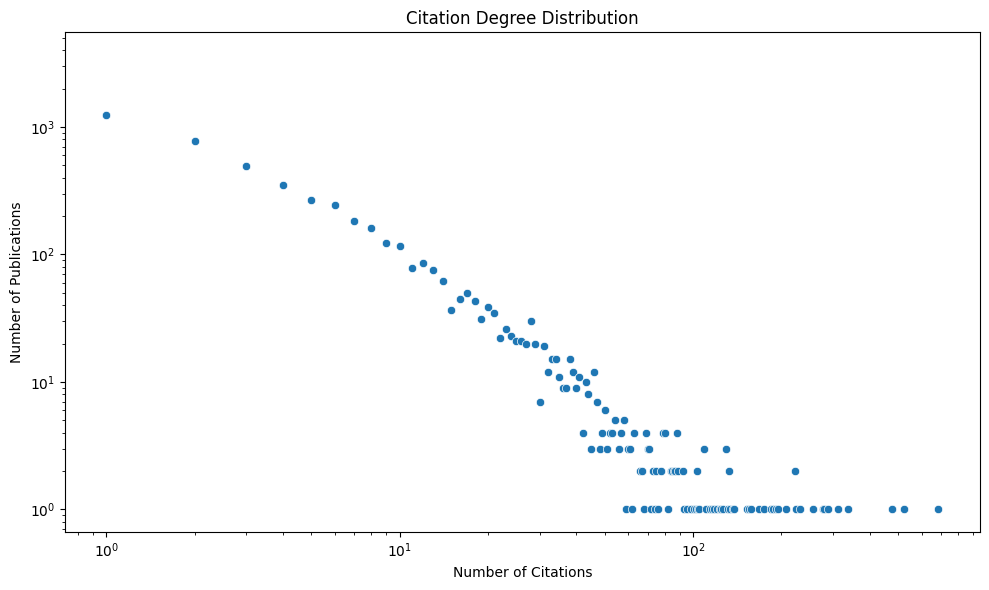

In [39]:
plot_citation_degree_distribution(ai_publications_df)
plt.show()

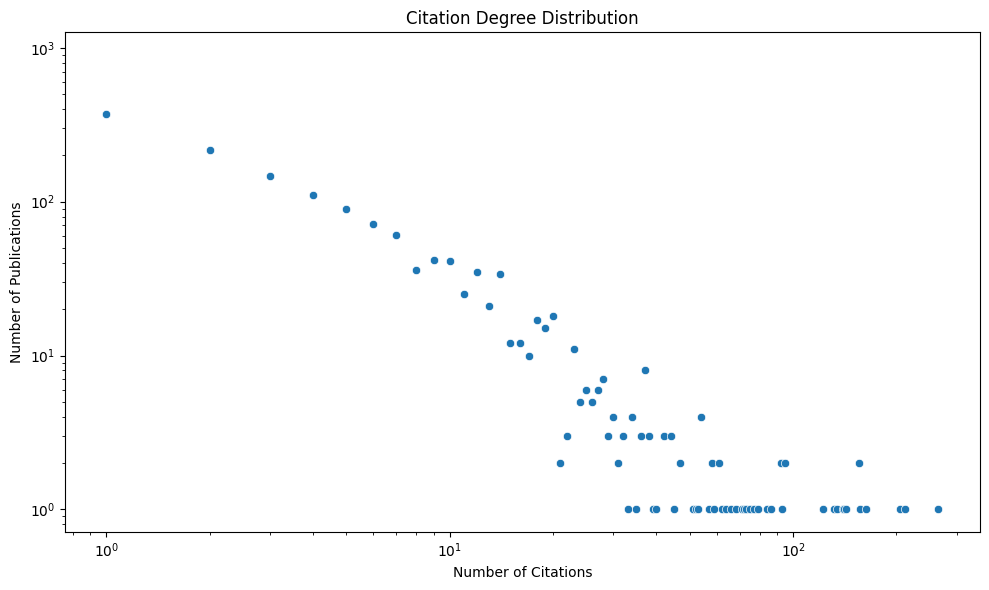

In [40]:
theory_publications_df = filter_subfielf_publications(br_publications_df, "Computational Theory and Mathematics")
plot_citation_degree_distribution(theory_publications_df)
plt.show()